In this assignment you will be using the data about the Titanic passengers to investigate the survival factors. 

Analysis Question: What factors made people more likely to survive? You need to investigate three variables: Class, Sex, Age 
    
The data is available in the “titanic-data.csv” file. The “Titanic Data Overview.docx” provides a description of the data fields shown in the csv file. 

Basically, you need to group the data according to each variable you want to investigate, then compare the “Survived” numbers and ratios (Why we need to use ratios?). 

For each comparison you perform, provide a bar plot to help visualize the results and summary to explain your findings in the comparison. 

In the end, provide a summary of your findings and your own conclusions. 

In [4]:
# import packages and data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

t_data = pd.read_csv('titanic-data.csv')

# i removed all the variablones and only left the three we will be dealing with

t_data = t_data.drop(['Cabin','Ticket','Name','Fare','PassengerId', 'Parch','Embarked', 'SibSp'],axis=1)
print(t_data.head())

print(t_data['Survived'].value_counts())
print( t_data['Survived'].value_counts() * 100 / len(t_data))
t_data['Survived'].value_counts().plot(kind='bar', color=['black', 'green'], title="people who survived vs. didn't")

   Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0
0    549
1    342
Name: Survived, dtype: int64
0    61.616162
1    38.383838
Name: Survived, dtype: float64


In [5]:
t_data.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


The count of males and females in a bar graph

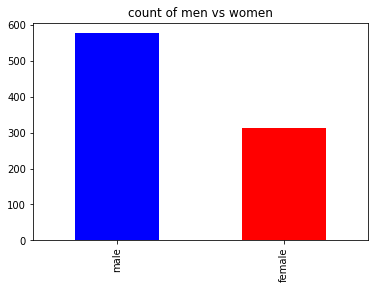

In [6]:
t_data['Sex'].value_counts().plot(kind='bar', color=['b', 'r'], title='count of men vs women')

The count of passengers by class

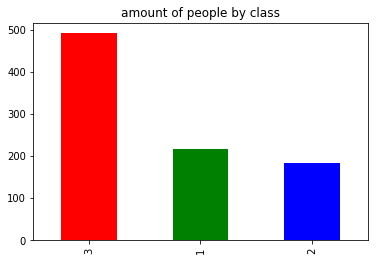

In [7]:
t_data['Pclass'].value_counts().plot(kind='bar', color=['r', 'g', 'b'], title='amount of people by class')

Survivors by class

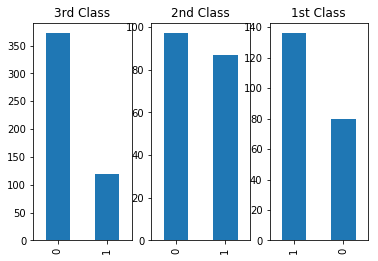

In [9]:

fig, axs = plt.subplots(1,3, sharey='row')

plt.yscale('linear')

t_data[(t_data['Pclass']  == 3)]['Survived'].value_counts().plot(kind='bar', title='3rd Class', ax=axs[0])
t_data[(t_data['Pclass']  == 2)]['Survived'].value_counts().plot(kind='bar', title='2nd Class', ax=axs[1])
t_data[(t_data['Pclass']  == 1)]['Survived'].value_counts().plot(kind='bar', title='1st Class', ax=axs[2])

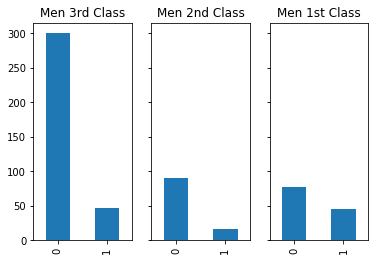

In [10]:
fig, axs = plt.subplots(1,3, sharey='row')
t_data[(t_data['Sex'] == 'male') & (t_data['Pclass']  == 3)]['Survived'].value_counts().plot(kind='bar', title='Men 3rd Class', ax=axs[0])
t_data[(t_data['Sex'] == 'male') & (t_data['Pclass']  == 2)]['Survived'].value_counts().plot(kind='bar', title='Men 2nd Class', ax=axs[1])
t_data[(t_data['Sex'] == 'male') & (t_data['Pclass']  == 1)]['Survived'].value_counts().plot(kind='bar', title='Men 1st Class', ax=axs[2])

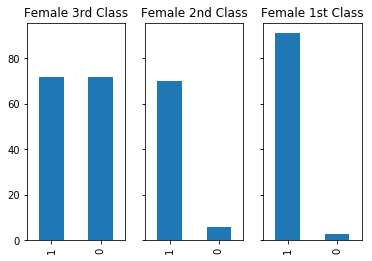

In [11]:
fig, axs = plt.subplots(1,3, sharey='row')
t_data[(t_data['Sex'] == 'female') & (t_data['Pclass']  == 3)]['Survived'].value_counts().plot(kind='bar', title='Female 3rd Class', ax=axs[0])
t_data[(t_data['Sex'] == 'female') & (t_data['Pclass']  == 2)]['Survived'].value_counts().plot(kind='bar', title='Female 2nd Class', ax=axs[1])
t_data[(t_data['Sex'] == 'female') & (t_data['Pclass']  == 1)]['Survived'].value_counts().plot(kind='bar', title='Female 1st Class', ax=axs[2])

In [8]:
c = t_data[(t_data['Pclass']  == 1)]['Survived'].value_counts()
f_survive = c[1]
f_no=c[0]
f_total = f_survive + f_no
c = t_data[(t_data['Pclass']  == 2)]['Survived'].value_counts()
s_survive = c[1]
s_no=c[0]
s_total = s_survive + s_no
c = t_data[(t_data['Pclass']  == 3)]['Survived'].value_counts()
t_survive = c[1]
t_no=c[0]
t_total =  t_survive + t_no

print("total people: ", f_total + s_total + t_total)
print("total survival: ", f_survive  + s_survive  + t_survive )
print("total died: ", t_no + s_no + f_no)
print("")
print("percentage of class one survived: ", f_survive / f_total*100)
print("percentage of class one no survive: ", f_no / f_total*100)
print("number of first survivors", f_survive)
print("number of first no survive: ", f_no)
print("")
print("percentage of class two survived: ", s_survive / s_total*100)
print("percentage of class two no survive: ", s_no / s_total*100)
print("number of two survivors", s_survive)
print("number of two no survive: ", s_no)
print("")
print("percentage of class third survived: ", t_survive / t_total*100)
print("percentage of class third no survive: ", t_no / t_total*100)
print("number of third survivors", t_survive)
print("number of third no survive: ", t_no)


total people:  891
total survival:  342
total died:  549

percentage of class one survived:  62.96296296296296
percentage of class one no survive:  37.03703703703704
number of first survivors 136
number of first no survive:  80

percentage of class two survived:  47.28260869565217
percentage of class two no survive:  52.71739130434783
number of two survivors 87
number of two no survive:  97

percentage of class third survived:  24.236252545824847
percentage of class third no survive:  75.76374745417516
number of third survivors 119
number of third no survive:  372


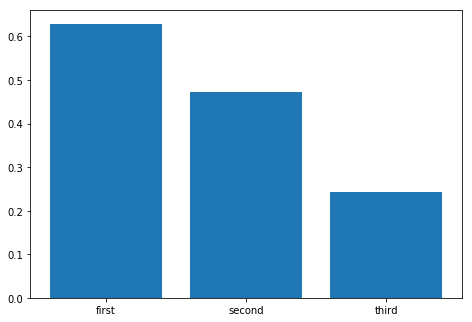

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['first', 'second', 'third']

percent = [(f_survive/f_total), ( s_survive/s_total), (t_survive/t_total)]
ax.bar(label, percent)
plt.show()

In [10]:
f = t_data[(t_data['Sex']  == 'female')]['Survived'].value_counts()
f_sur = f[1]
f_nosur = f[0]
m = t_data[(t_data['Sex']  == 'male')]['Survived'].value_counts()
m_sur = m[1]
m_nosur = m[0]

f_total = f_sur+f_nosur
m_total = m_sur + m_nosur

print("total female: ",f_total )
print("survived female: ", f_sur)
print("no survive female: ", f_nosur)
print("")
print("total male: ",m_total )
print("survived male: ", m_sur)
print("no survive male: ", m_nosur)
print("")
print("female survivale rate: ", f_sur/f_total*100)
print("male survival rate: ", m_sur/m_total *100)

total female:  314
survived female:  233
no survive female:  81

total male:  577
survived male:  109
no survive male:  468

female survivale rate:  74.20382165605095
male survival rate:  18.890814558058924


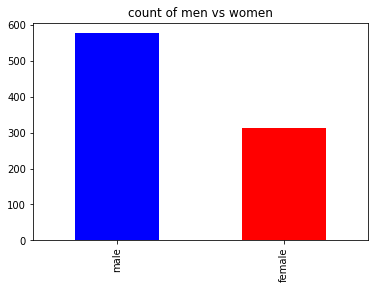

In [11]:
t_data['Sex'].value_counts().plot(kind='bar', color=['b', 'r'], title='count of men vs women')

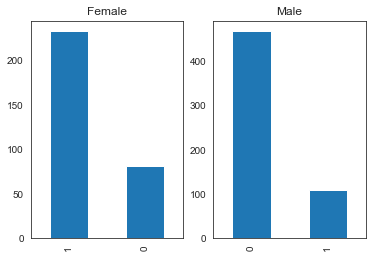

In [38]:
fig, axs = plt.subplots(1,2)
t_data[(t_data['Sex'] == 'female')]['Survived'].value_counts().plot(kind='bar', title='Female', ax=axs[0])
t_data[(t_data['Sex'] == 'male')]['Survived'].value_counts().plot(kind='bar', title='Male', ax=axs[1])


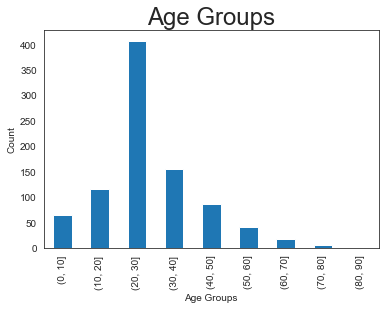

In [39]:
# i used the average age if the passengers were missing their ages

avgAge = t_data['Age'].mean()
t_data['Age'] = t_data.Age.fillna(avgAge)

# create an age group by 10 year intervals

ages = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
t_data['age_group'] = pd.cut(t_data.Age, ages, right=True, include_lowest=False)

# plot the age groups

t_data.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Age Groups",fontsize=24)
plt.ylabel('Count')
plt.xlabel('Age Groups');

In [40]:
# since non-survivors are 0 then you can add sum of survived by age group
print(t_data.groupby(['age_group']).Survived.sum())

age_group
(0, 10]      38
(10, 20]     44
(20, 30]    136
(30, 40]     69
(40, 50]     33
(50, 60]     17
(60, 70]      4
(70, 80]      1
(80, 90]      0
Name: Survived, dtype: int64


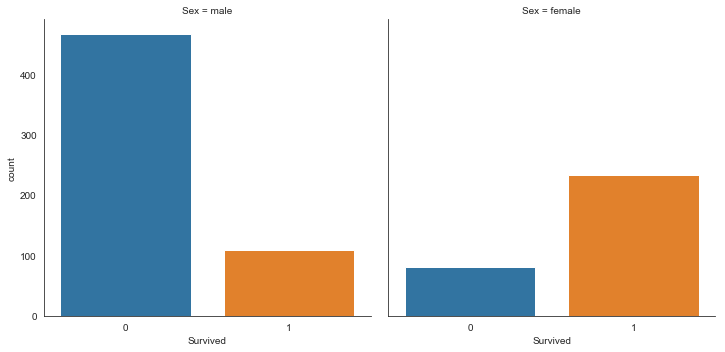

In [41]:
sns.catplot(x='Survived',col='Sex',kind='count',data=t_data)

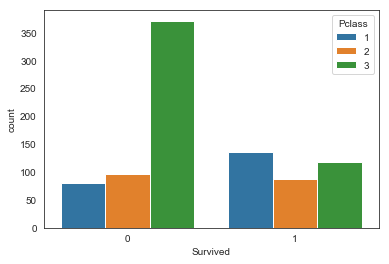

In [42]:
sns.countplot(x='Survived',hue='Pclass',data=t_data)

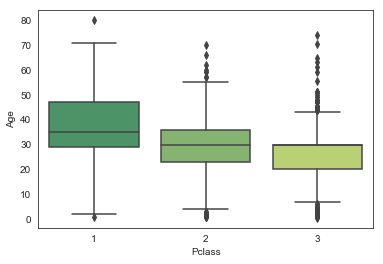

In [43]:
sns.boxplot(x='Pclass',y='Age',data=t_data,palette='summer')

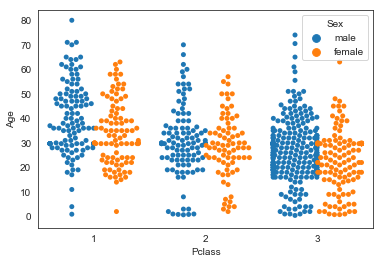

In [44]:
sns.swarmplot(x='Pclass', y='Age', data=t_data, hue='Sex', dodge=True)

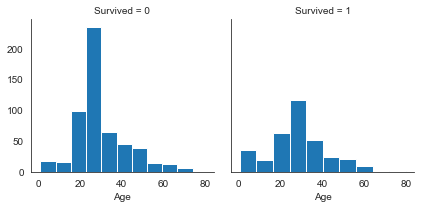

In [45]:
sns.set_style("white")
g = sns.FacetGrid(data = t_data[t_data['Age'].notna()], col = 'Survived')
g.map(plt.hist, "Age");

Text(0.5, 1.0, 'Gender Survival by Class')

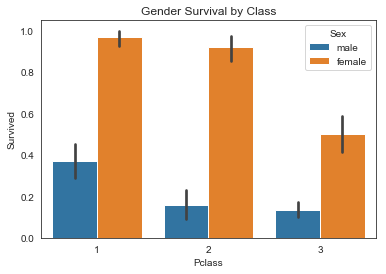

In [46]:
sns.barplot(x='Pclass', y='Survived', data=t_data, hue='Sex').set_title('Gender Survival by Class')

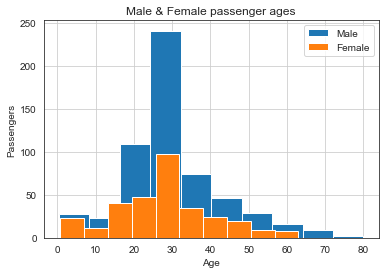

In [47]:
m_ages = (t_data[t_data.Sex == 'male'])['Age']
f_ages = (t_data[t_data.Sex == 'female'])['Age']
m_ages.hist(label='Male')
f_ages.hist(label='Female')

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Male & Female passenger ages')
plt.legend(loc='best')

In [48]:
def age_group(age):
    if age >= 80:
        return '80-89'
    if age >= 70:
        return '70-79'
    if age >= 60:
        return '60-69'
    if age >= 50:
        return '50-59'
    if age >= 40:
        return '40-49'
    if age >= 30:
        return '30-39'
    if age >= 20:
        return '20-29'
    if age >= 10:
        return '10-19'
    if age >= 0:
        return '0-9'
    
t_data['AgeGroup'] = t_data.Age.apply(age_group)

a_summary = t_data.groupby(['AgeGroup'], as_index=False)['Survived'].agg([np.sum, np.size])
a_summary = a_summary.rename(columns={'sum':'Survived', 'size':'Total'})
a_summary

,Survived,Total
AgeGroup,,
0-9,38,62
10-19,41,102
20-29,129,397
30-39,73,167
40-49,34,89
50-59,20,48
60-69,6,19
70-79,0,6
80-89,1,1


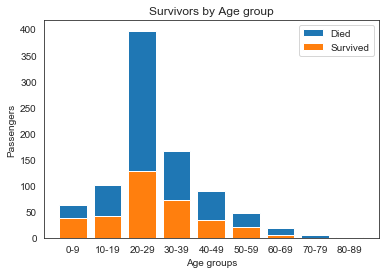

In [49]:
x = range(len(a_summary.index.values))
ht = a_summary.Total
hs = a_summary.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, a_summary.index.values)
plt.xlabel('Age groups')
plt.ylabel('Passengers')
plt.title('Survivors by Age group')


plt.legend([pht,phs],['Died', 'Survived'])

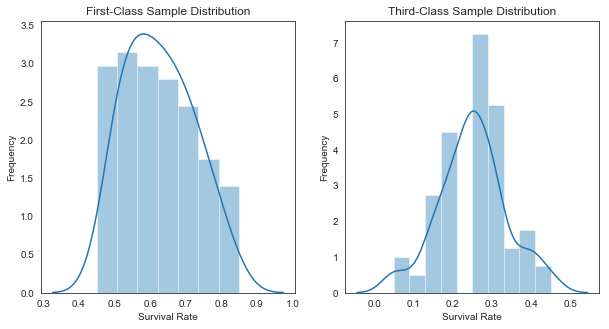

In [50]:
first_class = np.array([np.mean(t_data[t_data["Pclass"]==1].sample(20)["Survived"].values) for i in range(100)])
third_class = np.array([np.mean(t_data[t_data["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])

plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(first_class)
plt.title("First-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(third_class)
plt.title("Third-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

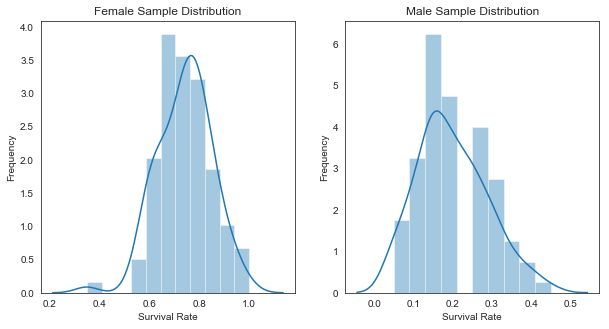

In [51]:
female = np.array([np.mean(t_data[t_data["Sex"]=='female'].sample(20)["Survived"].values) for i in range(100)])
male = np.array([np.mean(t_data[t_data["Sex"]=='male'].sample(20)["Survived"].values) for i in range(100)])

plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(female)
plt.title("Female Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(male)
plt.title("Male Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

In [52]:
print("first class std: ", np.std(first_class))
print("third class std: ", np.std(third_class))
print("first class mean: ", np.mean(first_class))
print("third class mean: ", np.mean(third_class))
print("zscore first: ",  st.zscore(first_class).sum())
print("zscore third: ",  st.zscore(third_class).sum())

print()
print("female std: ", np.std(female))
print("male std: ", np.std(male))
print('female mean: ', np.mean(female))
print('male mean: ', np.mean(male))
print("zscore female: ",  st.zscore(female).mean())
print("zscore male: ",  st.zscore(male).mean())



first class std:  0.09758457869971054
third class std:  0.08601744009211156
first class mean:  0.6265
third class mean:  0.251
zscore first:  6.317169010117141e-14
zscore third:  -4.440892098500626e-16

female std:  0.10770793842609744
male std:  0.08915716460273958
female mean:  0.743
male mean:  0.19899999999999998
zscore female:  1.0658141036401502e-16
zscore male:  1.8698584347554005e-16


With all the data we can reach a couple of conclusions.  Based on the percentage of survival by class and gender you can see that females in the first and second class had the highest rate of survival.  The group that had the lowest chance of survival is the men from the third class.  By the charts you can see the age group that was the biggest was the 20-30 age group so they had the most surviviors by number.  The youngest group from ages 0-10 in the first and second class almost all survived. Overall the females had a higher survival rate then men, and the youngest groups from ages 0-20 also had the highest survival rate.  Which makes you think that they adhered to the "women and children first" rule.  The overall passenger distribution was 65% were male and 35% were female and the female survival rate was almost 75% while the males only had about 19% chance of surviving.  63% of first class passenger survived and third class passengers had a survival rate of 24% which makes you think that the higher class passengers were given preference when it came to the life boats. If we used the Z-Test, the null hypothesis would be that socio-economic class and gender didn't have an affect on survival rate.  The alternative hypothesis would be that gender and socio-economic class did affect their survival rate.  If we look at the last two graphs, we see that the first class passengers had a survival distibution of over 0.5 which would be half and the third class passenger had a survival distibution of below 0.5 meaning that the passengers class did play a role in their survival rate.  The last charts compares the female and male distributions, the female survival rate was above 0.5 while the males had a survival rate of below 0.5 which also means that gender played a role in their survival rate. From the calculation we find that the z score is very low and the p value is extremely small and if we choose a significance levvel of 0.05 then we can reject the null hypothesis.  So we accept the alternative hypotheses is that says gender and socio-economic class have an affect on survival rate.